## Cardiovascular Disease Dataset

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from pprint import pprint

In [5]:
data = 'D:/Fall2022/Data Mining/cardio_train.csv'

df = pd.read_csv(data, delimiter=';')
df = df.drop(['id'], axis=1)

In [6]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [7]:
df.shape

(70000, 12)

In [8]:
print(df)

         age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0      18393       2     168    62.0    110     80            1     1      0   
1      20228       1     156    85.0    140     90            3     1      0   
2      18857       1     165    64.0    130     70            3     1      0   
3      17623       2     169    82.0    150    100            1     1      0   
4      17474       1     156    56.0    100     60            1     1      0   
...      ...     ...     ...     ...    ...    ...          ...   ...    ...   
69995  19240       2     168    76.0    120     80            1     1      1   
69996  22601       1     158   126.0    140     90            2     2      0   
69997  19066       2     183   105.0    180     90            3     1      0   
69998  22431       1     163    72.0    135     80            1     2      0   
69999  20540       1     170    72.0    120     80            2     1      0   

       alco  active  cardio  
0        

In [9]:
df.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [10]:
target = df.columns[df.shape[1]-1]

In [11]:
X = df.drop([target], axis=1)
y = df[target]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [13]:
X_train.shape, X_test.shape

((52500, 11), (17500, 11))

In [14]:
X_train.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
58774,19687,1,168,75.0,120,80,1,1,0,0,1
7414,20602,1,166,62.0,130,80,1,1,0,0,1
63662,23337,1,156,100.0,110,70,1,1,0,0,1
54551,14673,1,165,60.0,110,70,1,1,0,0,1
50995,18250,1,163,56.0,90,60,2,1,0,0,1


In [15]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [16]:
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [17]:
y_pred_en = clf_en.predict(X_test)

In [18]:
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.7291


In [19]:
y_pred_train_en = clf_en.predict(X_train)


In [20]:
print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))

Training set score: 0.7247


[Text(334.8, 380.52, 'X[4] <= 129.5\nentropy = 1.0\nsamples = 70000\nvalue = [35021, 34979]'),
 Text(167.4, 271.8, 'X[0] <= 19931.5\nentropy = 0.903\nsamples = 41326\nvalue = [28160, 13166]'),
 Text(83.7, 163.07999999999998, 'X[6] <= 2.5\nentropy = 0.793\nsamples = 25369\nvalue = [19318, 6051]'),
 Text(41.85, 54.360000000000014, 'entropy = 0.767\nsamples = 24290\nvalue = [18861, 5429]'),
 Text(125.55000000000001, 54.360000000000014, 'entropy = 0.983\nsamples = 1079\nvalue = [457, 622]'),
 Text(251.10000000000002, 163.07999999999998, 'X[6] <= 2.5\nentropy = 0.992\nsamples = 15957\nvalue = [8842, 7115]'),
 Text(209.25, 54.360000000000014, 'entropy = 0.98\nsamples = 14306\nvalue = [8350, 5956]'),
 Text(292.95, 54.360000000000014, 'entropy = 0.879\nsamples = 1651\nvalue = [492, 1159]'),
 Text(502.20000000000005, 271.8, 'X[4] <= 138.5\nentropy = 0.794\nsamples = 28674\nvalue = [6861, 21813]'),
 Text(418.5, 163.07999999999998, 'X[6] <= 2.5\nentropy = 0.972\nsamples = 9263\nvalue = [3719, 554

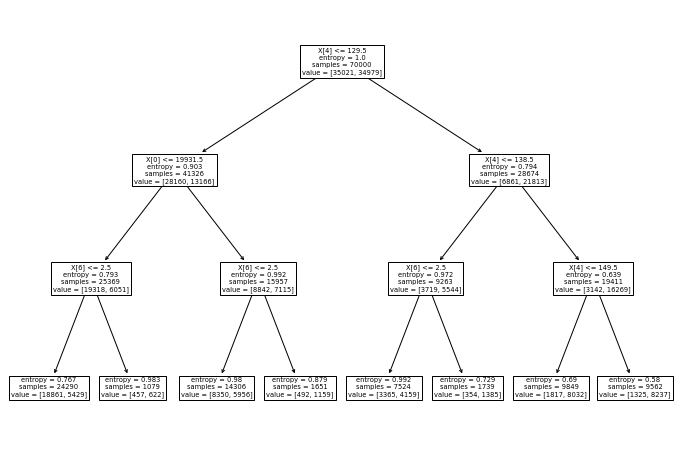

In [21]:
plt.figure(figsize=(12,8))

tree.plot_tree(clf_en.fit(X, y)) 

Calculate Entropy of column

In [22]:
def entropy(target_col):
    elements,counts = np.unique(target_col,return_counts = True)
    entropy = np.sum([(-counts[i]/np.sum(counts))*np.log2(counts[i]/np.sum(counts)) for i in range(len(elements))])
    return entropy
entropy(df[target])

0.9999997403148772

Calculate the information gain of a dataset. This function takes three parameters:
1. data = The dataset for whose feature the IG should be calculated
2. split_attribute_name = the name of the feature for which the information gain should be calculated
3. target_name = the name of the target feature. The default for this example is "class"
    
Calculate the entropy of the total dataset
Calculate the entropy of the dataset
Calculate the values and the corresponding counts for the split attribute 
Calculate the weighted entropy
Calculate the information gain

In [23]:
def InfoGain(data,split_attribute_name,target_name=target):

    total_entropy = entropy(data[target_name])
    

    vals,counts= np.unique(data[split_attribute_name],return_counts=True)
    
    Weighted_Entropy = np.sum([(counts[i]/np.sum(counts))*entropy(data.where(data[split_attribute_name]==vals[i]).dropna()[target_name]) for i in range(len(vals))])
    
    Information_Gain = total_entropy - Weighted_Entropy
    return Information_Gain
entropy(df)

5.051548992284653

In [24]:
def ID3(data,originaldata,features,target_attribute_name=target,parent_node_class = None):


    if len(np.unique(data[target_attribute_name])) <= 1:
        return np.unique(data[target_attribute_name])[0]
    
    elif len(data)==0:
        return np.unique(originaldata[target_attribute_name])[np.argmax(np.unique(originaldata[target_attribute_name],return_counts=True)[1])]
    

    elif len(features) ==0:
        return parent_node_class
    
    
    else:
        parent_node_class = np.unique(data[target_attribute_name])[np.argmax(np.unique(data[target_attribute_name],return_counts=True)[1])]
        
        item_values = [InfoGain(data,feature,target_attribute_name) for feature in features] #Return the information gain values for the features in the dataset
        best_feature_index = np.argmax(item_values)

        best_feature = features[best_feature_index]
        
        tree = {best_feature:{}}
                
        features = [i for i in features if i != best_feature]                
        
        for value in np.unique(data[best_feature]):
            value = value
            
            sub_data = data.where(data[best_feature] == value).dropna()
                        
            subtree = ID3(sub_data,data,features,target_attribute_name,parent_node_class)
            
            tree[best_feature][value] = subtree
            
        return(tree)   

In [25]:
def GainRatio(data,split_attribute_name,target_name=target):
    InformationGain = InfoGain(data,split_attribute_name,target_name=target)
    
    #Calculate splitInfo
    elements,counts = np.unique(data[target_name],return_counts = True)
    splitInfo = np.sum([(-counts[i]/len(data))*np.log2(counts[i]/len(data)) for i in range(len(elements))])
    
    gainRatio = InformationGain/splitInfo
    return gainRatio

In [26]:
def C4(data,originaldata,features,target_attribute_name=target,parent_node_class = None):

    if len(np.unique(data[target_attribute_name])) <= 1:
        return np.unique(data[target_attribute_name])[0]
    
    elif len(data)==0:
        return np.unique(originaldata[target_attribute_name])[np.argmax(np.unique(originaldata[target_attribute_name],return_counts=True)[1])]
        
    elif len(features) ==0:
        return parent_node_class
        
    else:
        parent_node_class = np.unique(data[target_attribute_name])[np.argmax(np.unique(data[target_attribute_name],return_counts=True)[1])]
        
        item_values = [GainRatio(data,feature,target_attribute_name) for feature in features] #Return the Gain Ratio values for the features in the dataset
        best_feature_index = np.argmax(item_values)
        best_feature = features[best_feature_index]

        tree = {best_feature:{}}
        
        features = [i for i in features if i != best_feature]
                
        for value in np.unique(data[best_feature]):
            value = value
            sub_data = data.where(data[best_feature] == value).dropna()
            
            subtree = C4(sub_data,data,features,target_attribute_name,parent_node_class)
            
            tree[best_feature][value] = subtree
            
        return(tree) 

In [27]:
def predict(query,tree,default = 1):

    for key in list(query.keys()):
        if key in list(tree.keys()):
            try:
                result = tree[key][query[key]] 
            except:
                return default
  
            result = tree[key][query[key]]
            if isinstance(result,dict):
                return predict(query,result)

            else:
                return result

In [28]:
def train_test_split(dataset):
    training_data = dataset.iloc[:10].reset_index(drop=True)
    testing_data = dataset.iloc[10:].reset_index(drop=True)
    return training_data,testing_data

training_data = train_test_split(df)[0]
testing_data = train_test_split(df)[1] 
print(training_data,'\n', testing_data)
print(data) 

     age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0  18393       2     168    62.0    110     80            1     1      0   
1  20228       1     156    85.0    140     90            3     1      0   
2  18857       1     165    64.0    130     70            3     1      0   
3  17623       2     169    82.0    150    100            1     1      0   
4  17474       1     156    56.0    100     60            1     1      0   
5  21914       1     151    67.0    120     80            2     2      0   
6  22113       1     157    93.0    130     80            3     1      0   
7  22584       2     178    95.0    130     90            3     3      0   
8  17668       1     158    71.0    110     70            1     1      0   
9  19834       1     164    68.0    110     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0  
5     0

In [29]:
def test(data,tree):
    queries = data.iloc[:,:-1].to_dict(orient = "records")
    
    predicted = pd.DataFrame(columns=["predicted"]) 
    
    for i in range(len(data)):
        predicted.loc[i,"predicted"] = predict(queries[i],tree,1.0) 
    print('The prediction accuracy is: ',(np.sum(predicted["predicted"] == data[target])/len(data))*100,'%')

In [30]:
tree = ID3(training_data,training_data,training_data.columns[:-1])
pprint(tree)
test(testing_data,tree)

{'age': {17474: 0.0,
         17623: 1.0,
         17668: 0.0,
         18393: 0.0,
         18857: 1.0,
         19834: 0.0,
         20228: 1.0,
         21914: 0.0,
         22113: 0.0,
         22584: 1.0}}


KeyboardInterrupt: 

In [31]:
tree = C4(training_data,training_data,training_data.columns[:-1])
pprint(tree)
test(testing_data,tree)

{'age': {17474: 0.0,
         17623: 1.0,
         17668: 0.0,
         18393: 0.0,
         18857: 1.0,
         19834: 0.0,
         20228: 1.0,
         21914: 0.0,
         22113: 0.0,
         22584: 1.0}}


KeyboardInterrupt: 

### Running cardiovascular dataset takes way too long about 100 times more than sample dataset due to the extremely large size of data 